# Analyze results

In [1]:
import json 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import sys 

# Add the directory containing the module to the Python path
module_path = '/home/tachennf/Documents/delta-rad/1D_radiomics/utils'
if module_path not in sys.path:
    sys.path.append(module_path)

# Now you can import your module
import analysis_functions as af
import dataset

# Retest Récidive Locale


In [ ]:
params = dataset.load_config("/home/tachennf/Documents/delta-rad/1D_radiomics/settings.yaml")
folder_path = params['paths']['data_folder_path']
outcome_csv = params['paths']['outcome_csv_file']
results_file = params['paths']['results_file']   
delta_rad_tables = params['paths']['delta_rad_tables']
outcomes_list = params['parameters']['outcomes_list']
feat_sel_algo_list = params['parameters']['feat_sel_algo_list']
pred_algo_list = params['parameters']['pred_algo_list']
nice_tables = ['SIMU', 'F1', 'F3', 'F5', 'Simu_F1', 'Simu_F3', 'Simu_F5', 'F1_F3', 'F1_F5']

results = pd.read_json(results_file)
results_dict = json.load(open(results_file))
print(results_dict.keys())  
print(pred_algo_list)
print(feat_sel_algo_list)

dict_keys(['simu_mridian_gtv.csv', 'f1_gtv.csv', 'f3_gtv.csv', 'f5_gtv.csv', 'rd_simu_f1_gtv.csv', 'rd_simu_f3_gtv.csv', 'rd_simu_f5_gtv.csv', 'rd_f1_f3_gtv.csv', 'rd_f1_f5_gtv.csv'])
['RF']
['ANOVA_K_BEST']


# Compare one algo with different metrics and CI

In [3]:
pred_algo = "RF"
feat_sel_algo = "ANOVA_K_BEST"
inter_res = results['simu_mridian_gtv.csv'][feat_sel_algo][pred_algo]['Récidive Locale']
#for table in delta_rad_tables: 
for nb_features in inter_res.keys():
    print(nb_features, inter_res[nb_features]['features'])
    print("Train AUC: ", np.mean(inter_res[nb_features]['train_metrics']['auc']['values']))
    print(inter_res[nb_features]['test_metrics']['auc'])
    print("Test AUC: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['auc']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[1]))
    print("Test Brier loss: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['brier_loss']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[1]))
    print("Test sensitivity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['sensitivity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[1]))
    print("Test specificity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['specificity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[1]))
    print('')


1 ['original_shape_Elongation']
Train AUC:  0.7224496877870716
{'values': [0.541380853588975, 0.543774420854637, 0.47231101325553804, 0.897872941447959, 0.588823550323011], 'conf_int': [[0.192307692307692, 0.8571428571428571], [0.24375000000000002, 0.7916666666666661], [0.152211538461538, 0.884615384615384], [0.636363636363636, 1.0], [0.08863636363636301, 0.9287499999999981]]}
Test AUC: 0.6088325558940241 (0.2626538461538458; 0.892434981684981)
Test Brier loss: 0.2614731947137172 (0.182559037352773; 0.3442876976290575)
Test sensitivity: 0.3833333333333332 (0.3833333333333332; 0.3833333333333332)
Test specificity: 0.6036363636363634 (0.6036363636363634; 0.6036363636363634)

2 ['original_shape_Elongation', 'original_firstorder_Kurtosis']
Train AUC:  0.7473012702999102
{'values': [0.544478092740592, 0.370069823793228, 0.380329755392569, 0.7658581260212091, 0.680843721565186], 'conf_int': [[0.152529761904761, 0.8500000000000001], [0.16666666666666602, 0.64621212121212], [0.0, 0.76777777777

## Best train AUC

In [4]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='train_auc', k = 3)

Top 3 results for each table and Récidive Locale in terms of train_auc:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean train_auc: 0.7856077529167524, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation', 'original_firstorder_Kurtosis', 'original_glszm_LargeAreaHighGrayLevelEmphasis']


Top 3 mean results for table f1_gtv.csv:
Mean train_auc: 0.8703993252037119, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_MCC', 'original_firstorder_Kurtosis']


Top 3 mean results for table f3_gtv.csv:
Mean train_auc: 0.8026266921452964, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glszm_GrayLevelNonUniformityNormalized', 'original_glcm_MCC']


Top 3 mean results for table f5_gtv.csv:
Mean train_auc: 0.7885847107438013, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_Imc1', 'original_glcm_MCC']


Top 

Top 1 results for each table and Récidive Locale in terms of train_auc:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17e134bbb0>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17e135d130>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17e134b910>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17e135d670>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17e135d910>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of train AUC for récidive locale'),
 (0.0, 1.0),
 ([<matplotlib.axis.XTick at 0x7f17e139be50>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

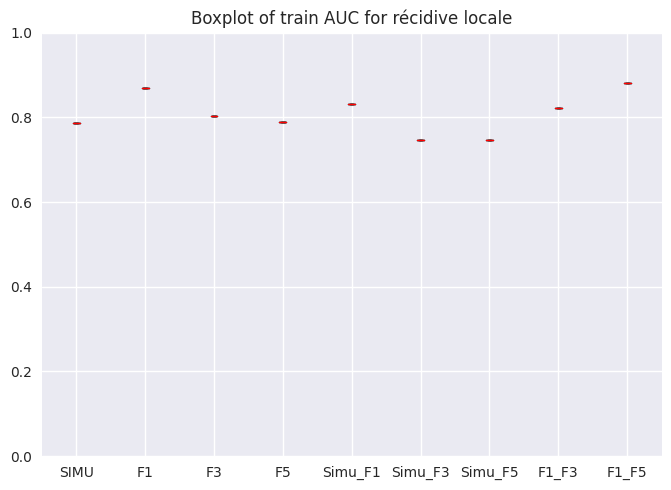

In [8]:
plt.style.use('seaborn-v0_8')
widths = 0.1
medianprops = dict(linestyle='-', linewidth=1, color='red')

data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='train_auc', outcome='Récidive Locale', k=1)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of train AUC for récidive locale'), plt.ylim([0, 1]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best train Brier loss

In [ ]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='train_brier_loss', k = 3)

Top 3 results for each table and Récidive Locale in terms of train_brier_loss:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean train_brier_loss: 0.22241435126128478, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation', 'original_firstorder_Kurtosis', 'original_glszm_LargeAreaHighGrayLevelEmphasis']


Top 3 mean results for table f1_gtv.csv:
Mean train_brier_loss: 0.2010879908297714, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_MCC', 'original_firstorder_Kurtosis', 'original_glszm_LargeAreaHighGrayLevelEmphasis']


Top 3 mean results for table f3_gtv.csv:
Mean train_brier_loss: 0.21203173557056462, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glszm_GrayLevelNonUniformityNormalized']


Top 3 mean results for table f5_gtv.csv:
Mean train_brier_loss: 0.215992784186907, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BE

Top 1 results for each table and Récidive Locale in terms of train_brier_loss:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17e11413d0>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17e1141910>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17e1141130>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17e1141e50>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17e114e130>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of train Brier loss for récidive locale'),
 (0.0, 0.5),
 ([<matplotlib.axis.XTick at 0x7f18126041c0>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

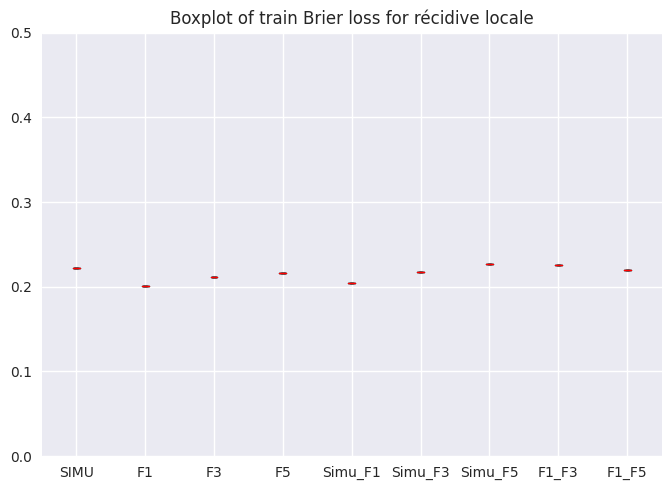

In [10]:
data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='train_brier_loss', outcome='Récidive Locale', k=1)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of train Brier loss for récidive locale'), plt.ylim([0, 0.5]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best test AUC

In [ ]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='test_auc', k = 3)

Top 3 results for each table and Récidive Locale in terms of test_auc:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean test_auc: 0.6088325558940241, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation']


Top 3 mean results for table f1_gtv.csv:
Mean test_auc: 0.6987986898433081, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_MCC']


Top 3 mean results for table f3_gtv.csv:
Mean test_auc: 0.7121142179882907, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glszm_GrayLevelNonUniformityNormalized', 'original_glcm_MCC']


Top 3 mean results for table f5_gtv.csv:
Mean test_auc: 0.5724625488391392, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_Imc1', 'original_glcm_MCC']


Top 3 mean results for table rd_simu_f1_gtv.csv:
Mean test_auc: 0.7036169580467836, Prediction Algorithm: RF, Feature Sele

Top 1 results for each table and Récidive Locale in terms of test_auc:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17e0cd57f0>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17e0cd5d30>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17e0cd5550>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17e0ce52b0>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17e0ce5550>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of test AUC for récidive locale'),
 (0.5, 0.8),
 ([<matplotlib.axis.XTick at 0x7f17e0d23ac0>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

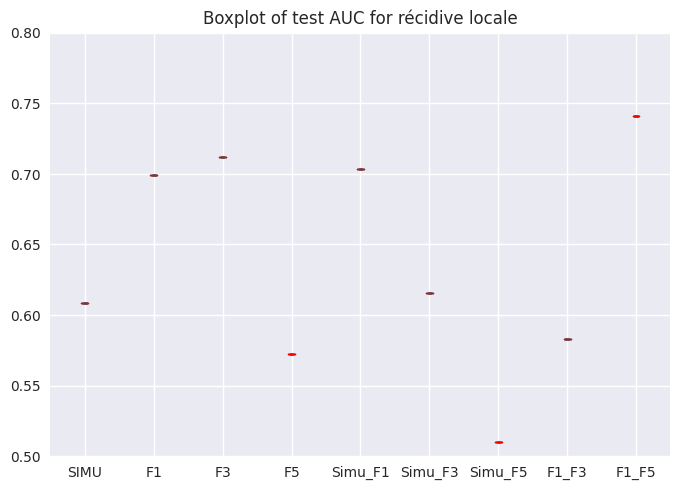

In [14]:
data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='test_auc', outcome='Récidive Locale', k=1)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of test AUC for récidive locale'), plt.ylim([0.5, 0.8]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best test brier loss

In [ ]:
test_brier_loss = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='test_brier_loss', k = 3)

Top 3 results for each table and Récidive Locale in terms of test_brier_loss:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean test_brier_loss: 0.262399773881581, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation', 'original_firstorder_Kurtosis', 'original_glszm_LargeAreaHighGrayLevelEmphasis']


Top 3 mean results for table f1_gtv.csv:
Mean test_brier_loss: 0.23369784081450762, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_MCC', 'original_firstorder_Kurtosis', 'original_glszm_LargeAreaHighGrayLevelEmphasis']


Top 3 mean results for table f3_gtv.csv:
Mean test_brier_loss: 0.2350524844399086, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glszm_GrayLevelNonUniformityNormalized', 'original_glcm_MCC', 'original_glcm_Imc2']


Top 3 mean results for table f5_gtv.csv:
Mean test_brier_loss: 0.26958336090561863, Prediction Algorithm: RF, F

Top 1 results for each table and Récidive Locale in terms of test_brier_loss:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17e077e790>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17e077ecd0>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17e077e490>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17e0712250>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17e07124f0>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of test Brier loss for récidive locale'),
 (0.0, 0.5),
 ([<matplotlib.axis.XTick at 0x7f17e07548e0>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

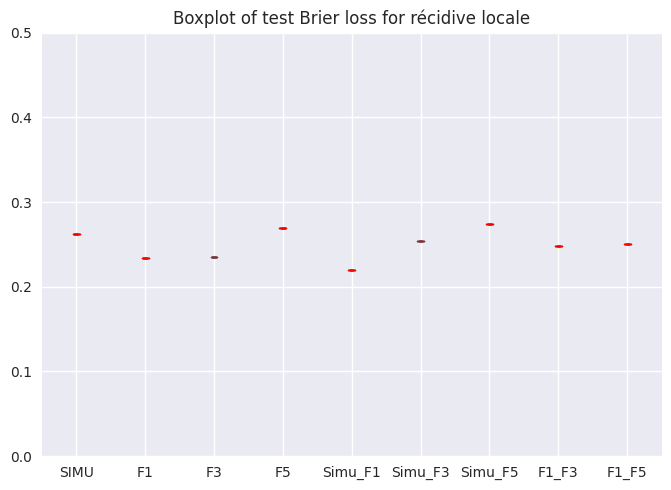

In [19]:
data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='test_brier_loss', outcome='Récidive Locale', k=1)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of test Brier loss for récidive locale'), plt.ylim([0, 0.5]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best sensitivity

In [ ]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='sensitivity', k = 3)

Top 3 results for each table and Récidive Locale in terms of sensitivity:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean sensitivity: 0.55, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation', 'original_firstorder_Kurtosis']


Top 3 mean results for table f1_gtv.csv:
Mean sensitivity: 0.7333333333333332, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_MCC']


Top 3 mean results for table f3_gtv.csv:
Mean sensitivity: 0.5333333333333332, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glszm_GrayLevelNonUniformityNormalized']


Top 3 mean results for table f5_gtv.csv:
Mean sensitivity: 0.433333333333333, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_Imc1']


Top 3 mean results for table rd_simu_f1_gtv.csv:
Mean sensitivity: 0.45, Prediction Algorithm: RF, Feature Selection Algorithm: ANOV

Top 1 results for each table and Récidive Locale in terms of sensitivity:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17e0866400>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17e08667f0>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17e0866160>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17e0866d60>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17e0874040>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of sensitivity for récidive locale'),
 (0.0, 1.0),
 ([<matplotlib.axis.XTick at 0x7f17e08b5340>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

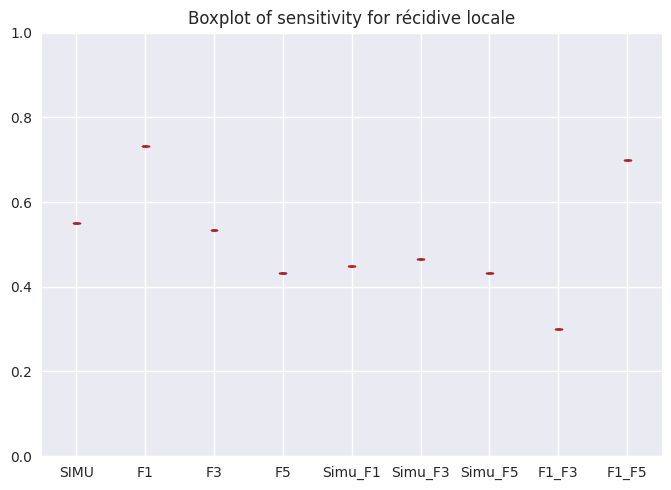

In [18]:
data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='sensitivity', outcome='Récidive Locale', k=1)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of sensitivity for récidive locale'), plt.ylim([0, 1]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best specificity

In [ ]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='specificity', k = 3)

Top 3 results for each table and Récidive Locale in terms of specificity:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean specificity: 0.6418181818181816, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation', 'original_firstorder_Kurtosis']


Top 3 mean results for table f1_gtv.csv:
Mean specificity: 0.7545454545454541, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_MCC', 'original_firstorder_Kurtosis']


Top 3 mean results for table f3_gtv.csv:
Mean specificity: 0.7348484848484844, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glszm_GrayLevelNonUniformityNormalized', 'original_glcm_MCC', 'original_glcm_Imc2']


Top 3 mean results for table f5_gtv.csv:
Mean specificity: 0.7272727272727268, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_Imc1', 'original_glcm_MCC']


Top 3 mean results fo

Top 1 results for each table and Récidive Locale in terms of specificity:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17e09b8fa0>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17e094a520>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17e09b8d00>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17e094aa60>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17e094ad00>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of specificity for récidive locale'),
 (0.0, 1.0),
 ([<matplotlib.axis.XTick at 0x7f17e0999190>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

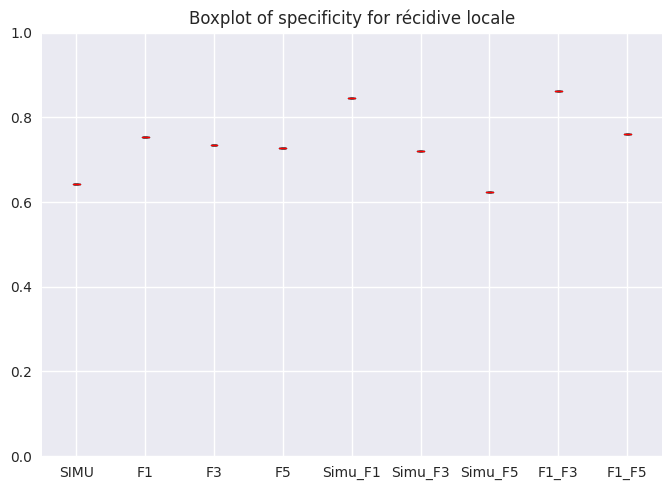

In [17]:
data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='specificity', outcome='Récidive Locale', k=1)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of specificity for récidive locale'), plt.ylim([0, 1]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best spe & sens

In [ ]:
af.find_perf_alg(results, delta_rad_tables, ['Récidive Locale'], feat_sel_algo_list, pred_algo_list, metric='sens_spec', threshold=0.6)

Table: f1_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Number of Features: 1, '
'                                           TEST AUC: 0.6987986898433081, Sensitivity: 0.7333333333333332, Specificity: 0.6090909090909087, '
'                                           Features: ['original_glcm_MCC']
Table: rd_f1_f5_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Number of Features: 3, '
'                                           TEST AUC: 0.7410226665904249, Sensitivity: 0.6999999999999998, Specificity: 0.7599999999999996, '
'                                           Features: ['original_shape_Maximum3DDiameter', 'original_shape_Maximum2DDiameterRow', 'original_gldm_DependenceEntropy']
